In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/NLP/fake_news/train.csv')

In [5]:
train_df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [7]:
train_df.shape

(20800, 2)

In [8]:
train_df.head(15)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


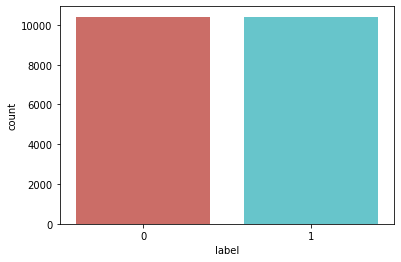

In [9]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')
create_distribution(train_df)

In [10]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


In [11]:
train_df = train_df.dropna()

In [12]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [13]:
train_df.shape

(20761, 2)

In [14]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [15]:
train_df.reset_index(drop= True,inplace=True)

In [16]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [17]:
label_train = train_df.label

In [18]:
label_train.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [19]:
train_df = train_df.drop("label", axis = 1)

In [20]:
train_df.head(10)

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
5,"In these trying times, Jackie Mason is the Voi..."
6,Ever wonder how Britain’s most iconic pop pian...
7,"PARIS — France chose an idealistic, traditi..."
8,Donald J. Trump is scheduled to make a highly ...
9,A week before Michael T. Flynn resigned as nat...


In [21]:
train_df['text'][2188]

'\nThis article was written by John Vibes and originally published at Activist Post.com . \nEditor’s Comment: On the surface, there are good intentions here. The Bushes, like other patriotic establishment figures, always honor the troops, and count the sacrifices. Typically, they are stoic and praiseworthy of everything the military does. But underneath the surface, one has to wonder what is really going on inside the disturbed mind of George W. Bush – whose orders for an illegal war in Iraq, and a broader War on Terror in Afghanistan and elsewhere resulted in the deaths of thousands of U.S. troops, tens of thousands of wounded or injured and potentially more than a million civilians dead. \nDoes he feel remorse? Guilt? Has he admitted to his personal responsibility for what happened to their lives? Or do his paintings reveal a morbid sense of power over the lives of men and women whom he can only reflect upon and humanize after the fact? Considering that the Iraq war was based upon a 

In [22]:
lemmatizer = WordNetLemmatizer()
# stpwrds = list(stopwords.words('english'))

In [23]:
# stopwords

In [24]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in nltk.corpus.stopwords.words("english") :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review

In [25]:
train_df['text'][2182]

'comment actor steven seagal stood america rest hollywood remains silent week rough country first democratic nominee hillary clinton collapsed memorial called million hardworking american deplorable werent enough nfl player throughout country blatantly disrespecting american flag needle say seagal enough think important job secretary state ensuring people dont get killed seagal tweeted cant email protected pneumonia going disastrous american people notohillary continued course seagal quickly became target liberal fire comment refused break particularly lost one twitter user tried argued hillary capable presidency capable capable leaving american die capable disregarding law capable disrespecting rape survivor argued went address race relation united state true role president barack obama played social evolution country obama abysmal race relation usa truth need start honest dialog wrote seagal concluded pointing irony attack receiving liberal everywhere best thing worldmaking one state

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.3, random_state=1)

In [27]:
X_train

10140    comment fox news star megyn kelly finally reve...
11508    written daniel mcadams told attack iraq saddam...
4035     u representative california introduced bill bl...
4528     paris salah abdeslam thought direct participan...
2608     photo jorge lascar photo great wall china vasi...
                               ...                        
10955    daily caller progress unity found progress uni...
17289    archie elam third career transition living sta...
5192     philadelphia sometimes exhibition planned year...
12172    here something interesting unz review recipien...
235      changing montenegrin leader change ideology so...
Name: text, Length: 14532, dtype: object

In [28]:
X_train.shape

(14532,)

In [29]:
Y_train

10140    1
11508    1
4035     0
4528     0
2608     1
        ..
10955    1
17289    0
5192     0
12172    1
235      1
Name: label, Length: 14532, dtype: int64

In [30]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [31]:
tfidf_X_train.shape

(14532, 137427)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 95.62%
Confusion matrix, without normalization


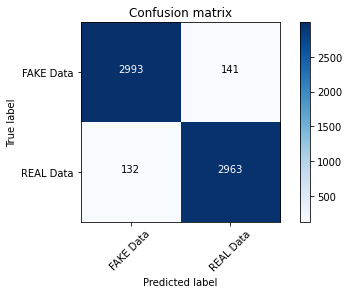

In [34]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [35]:
import bz2
ofile = bz2.BZ2File('./model.pkl','wb')
pickle.dump(classifier,ofile)
ofile.close()

In [36]:
ifile = bz2.BZ2File('./model.pkl','rb')
loaded_model = pickle.load(ifile)
ifile.close()

# load the model from disk
# loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [37]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")